# Rational Function Fit

Fit a 2nd order rational function to some data, 
corresponding to the following problem:

    minimize  max |P(t_i)/Q(t_i) - y_i| for all i
    s.t.      Q(t_i) > 0                for all i

              where P(t) = a_0 + a_1*t + a_2*t^2
              Q(t) =   1 + b_1*t + b_2*t^2
              
              Data points are (t_i, y_i) for i = 1, ..., k

Convert the non-convex problem above into a quasiconvex problem,
which is then solved by solving a sequence of convex feasibility problems
through a bisection algorithm.

## Setup

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from bisection_algorithm import bisection_algorithm

In [4]:
# --- Generate Data To Be Fitted --- #
k = 250                    # num data points
t = np.linspace(0.1, 4, k) # data x values
y = np.log(t)              # data y values

## Perform Fit

In [5]:
alpha_l = 0
alpha_u = 1e2

coeffs = bisection_algorithm(t, y, alpha_l, alpha_u, 100)


 Converged on a solution in 17 iterations.



## Plot Fit

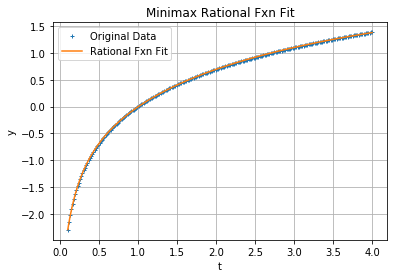

In [6]:
t_stack = np.vstack((np.ones(y.size), t, t**2)).T
y_hat = np.sum(t_stack * np.hstack(coeffs[0:3]), 1) / np.sum(t_stack * np.hstack((1, coeffs[3], coeffs[4])), 1)

plt.figure()
plt.plot(t, y, '+', markersize=4, label='Original Data')
plt.plot(t, y_hat, label='Rational Fxn Fit')
plt.grid()
plt.ylabel('y')
plt.xlabel('t')
plt.title('Minimax Rational Fxn Fit')
plt.legend()
plt.show()

## Plot Residuals

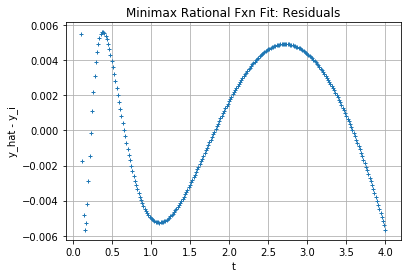

In [7]:
plt.figure()
plt.plot(t, y_hat - y, '+', markersize=4)
plt.grid()
plt.xlabel('t')
plt.ylabel('y_hat - y_i')
plt.title('Minimax Rational Fxn Fit: Residuals')
plt.show()

We see the solution achieves a nice fit of the original data.